In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [3]:
df = pd.read_csv('MyEBirdData.csv')
df

,Submission ID,Common Name,Scientific Name,Taxonomic Order,Count,State/Province,County,Location ID,Location,Latitude,...,Protocol,Duration (Min),All Obs Reported,Distance Traveled (km),Area Covered (ha),Number of Observers,Breeding Code,Observation Details,Checklist Comments,ML Catalog Numbers
0,S285938033,Canada Goose,Branta canadensis,342,120,US-MD,Baltimore,L558364,Loch Raven Reservoir--Primary Dam,39.431420,...,eBird - Traveling Count,16.0,1,0.074,NaN,1,NaN,NaN,No EUWI :(,NaN
1,S219245705,Canada Goose,Branta canadensis,342,4,US-MD,Cecil,L827083,Conowingo Park,39.658868,...,eBird - Traveling Count,30.0,1,0.805,NaN,1,NaN,NaN,NaN,NaN
2,S289886153,Canada Goose,Branta canadensis,342,90,US-MD,Cecil,L451204,Perryville Community Park,39.547140,...,eBird - Traveling Count,90.0,1,0.719,NaN,1,NaN,NaN,Conservative aythya estimates,NaN
3,S280099098,Canada Goose,Branta canadensis,342,8,US-DC,District of Columbia,L247770,Kenilworth Park and Aquatic Gardens,38.913320,...,eBird - Traveling Count,34.0,1,1.664,NaN,1,NaN,NaN,Birding riverwalk trail by bike,NaN
4,S269633855,Canada Goose,Branta canadensis,342,7,US-MD,Harford,L446446,Swan Harbor Farm Park,39.522482,...,eBird - Traveling Count,102.0,1,1.960,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,S283766063,Northern Cardinal,Cardinalis cardinalis,34515,1,US-MD,Prince George's,L7859025,Paint Branch Stream Valley Park,38.986600,...,eBird - Traveling Count,30.0,1,0.576,NaN,1,NaN,NaN,NaN,NaN
1108,S285569332,Northern Cardinal,Cardinalis cardinalis,34515,2,US-MD,Prince George's,L7859025,Paint Branch Stream Valley Park,38.986600,...,eBird - Traveling Count,20.0,1,1.122,NaN,1,NaN,NaN,NaN,NaN
1109,S276300435,Northern Cardinal,Cardinalis cardinalis,34515,1,US-MD,Prince George's,L27283231,University of Maryland--Campus Creek,38.995083,...,eBird - Traveling Count,34.0,1,0.132,NaN,1,NaN,NaN,NaN,NaN
1110,S269633855,Indigo Bunting,Passerina cyanea,34607,2,US-MD,Harford,L446446,Swan Harbor Farm Park,39.522482,...,eBird - Traveling Count,102.0,1,1.960,NaN,1,NaN,NaN,NaN,NaN


# Create dataframe

In [4]:
# create new dataframe
checklists = df[['Submission ID', 'Distance Traveled (km)', 'Duration (Min)', 'Time']].copy()
# replace NaN time/distance (incidental checklist) with 0
checklists['Distance Traveled (km)'] = checklists['Distance Traveled (km)'].fillna(0)
checklists['Duration (Min)'] = checklists['Duration (Min)'].fillna(0)
checklists['Time'] = checklists['Time'].fillna(0)
# group checklists and calculate # of species per checklist
species_qty = checklists.groupby(['Submission ID', 'Distance Traveled (km)', 'Duration (Min)', 'Time'])['Submission ID'].count().reset_index(name='Species count')
species_qty

,Submission ID,Distance Traveled (km),Duration (Min),Time,Species count
0,S178979621,0.000,0.0,0,1
1,S179661068,0.000,0.0,0,1
2,S179661249,0.000,0.0,0,1
3,S180012436,0.000,0.0,0,1
4,S180013098,0.000,0.0,0,1
...,...,...,...,...,...
90,S285938033,0.074,16.0,09:07 AM,14
91,S286222727,2.933,126.0,08:59 AM,35
92,S287406297,1.196,83.0,01:21 PM,31
93,S287423490,0.000,0.0,04:15 PM,2


# Species quantity by checklist distance

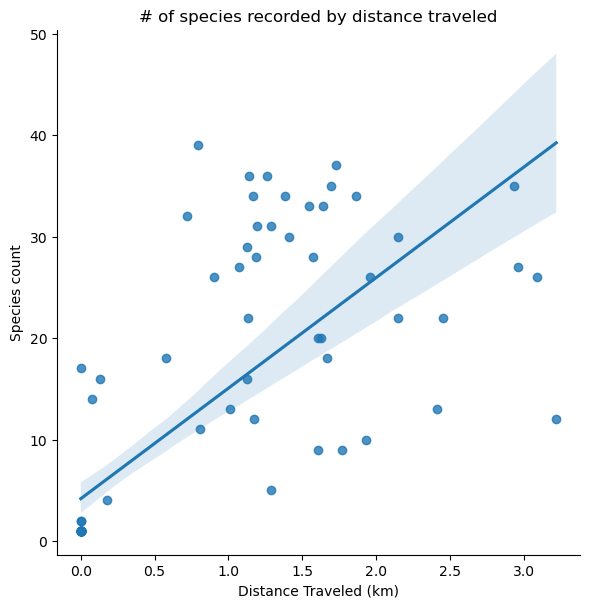

In [11]:
sns.lmplot(x='Distance Traveled (km)', y='Species count', data=species_qty, height=6)
plt.title('# of species recorded by distance traveled')
plt.show()

# Species quantity by checklist length

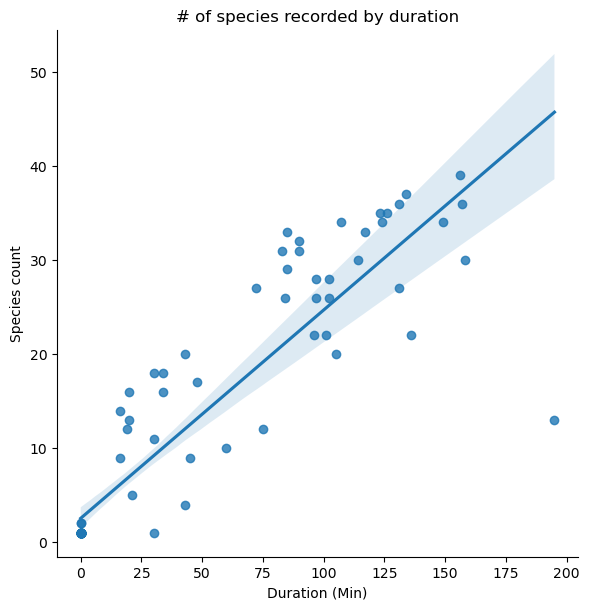

In [12]:
sns.lmplot(x='Duration (Min)', y='Species count', data=species_qty, height=6)
plt.title('# of species recorded by duration')
plt.show()

# Time of day and mean species quantity

## Create new dataframe

In [7]:
# select time/species count and remove rows without time
qty_time = species_qty[species_qty['Time'] != 0][['Time', 'Species count']].copy()
# convert time column to datetime
qty_time['Time'] = pd.to_datetime(qty_time['Time'], format='%I:%M %p')
qty_time = qty_time.set_index('Time')

## Find range and outliers

In [8]:
# find outliers
qty_time = qty_time.sort_index()
print(qty_time.head()[:5])
print(qty_time.tail()[:5])

# remove 00:00 outlier
qty_time = qty_time.between_time('1:00', '21:00')
qty_time[:5]

                     Species count
Time                              
1900-01-01 00:00:00              2
1900-01-01 06:46:00             37
1900-01-01 06:49:00             26
1900-01-01 07:04:00             34
1900-01-01 07:08:00             36
                     Species count
Time                              
1900-01-01 16:10:00              1
1900-01-01 16:15:00             12
1900-01-01 16:15:00              2
1900-01-01 19:20:00              1
1900-01-01 20:45:00              1


,Species count
Time,
1900-01-01 06:46:00,37
1900-01-01 06:49:00,26
1900-01-01 07:04:00,34
1900-01-01 07:08:00,36
1900-01-01 07:15:00,29


## Separate data into timeframes

In [9]:
q1 = int(qty_time.between_time('6:00', '9:00').mean().iloc[0])
q2 = int(qty_time.between_time('10:00', '13:00').mean().iloc[0])
q3 = int(qty_time.between_time('14:00', '17:00').mean().iloc[0])
q4 = int(qty_time.between_time('18:00', '21:00').mean().iloc[0])

time_of_day = pd.DataFrame({'Timeframe': ['6 AM - 9 AM', '10 AM - 1 PM', '2 PM - 5 PM', '6 PM - 9 PM'],
                            'Average species count': [q1, q2, q3, q4]})
    
time_of_day

,Timeframe,Average species count
0,6 AM - 9 AM,25
1,10 AM - 1 PM,14
2,2 PM - 5 PM,9
3,6 PM - 9 PM,1


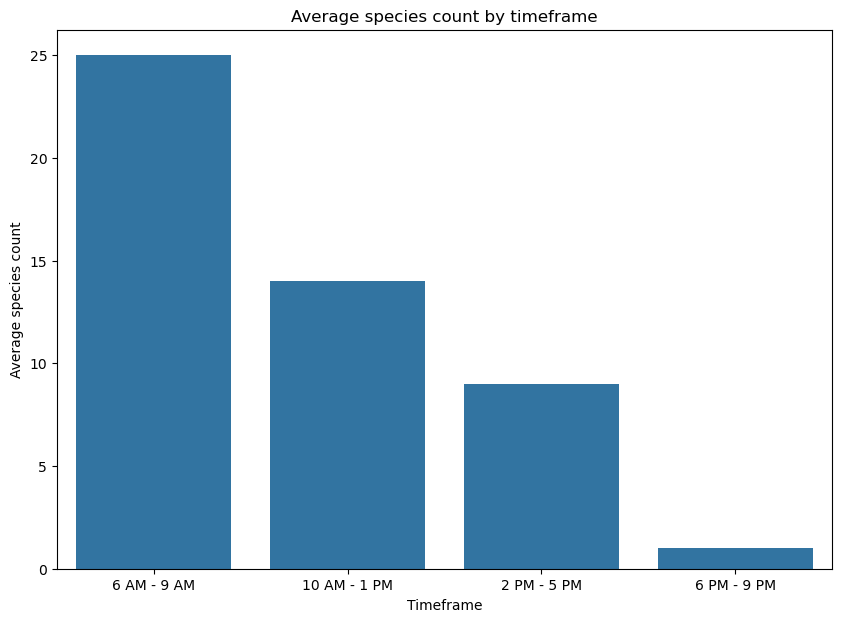

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x='Timeframe', y='Average species count', data=time_of_day)
plt.title('Average species count by timeframe')
plt.show()